In [24]:
import numpy as np 
import pandas as pd 
from optim import *
from matplotlib import pyplot as plt

# Overview

We had a number of issues with the solution. I solved all of them. The most important one was that the lower bound for the golden section search (consumption) was set relative to maximum consumption at too large a value. This lead to more consumption that what the consumer wanted optimally. Once I fixed that, the current parameters we were using gave me very increasing consumption profiles (not believable). 

* In this note, we attempt to check whether the approximation works ok when we skip ages and use decision rules for other ages. 

Here are the preferences I am using. 

``` python
varepsilon= 0.75, d_varepsilon=0.5, gamma = 0.25,
                d_gamma = 0.5, rho = 0.1, b_x = 0.0, d_b_x = 0.001, b_k = 1e3,
                 nu_c0 = 1.0, nu_c1 = 0.5, nu_c2 = 0.2, nu_h0 = 0.05, nu_h1 =
                 0.05, d_nu_h = 0.0, beta = 0.97,
```

I will discuss on call why I am using those. 

* There is a clear issue with $\varepsilon>1$ and $\gamma<1$, a very steep consumption-age profile emerges when we have that. 
* Also, because of rising house prices, we need almost perfect substituability between consumption and housing ($\rho=0$) to keep consumption not rising too much. 
* The bequest motive now works well as can be seen from the last graph. 
* Also with $\varepsilon<1$ and $\gamma<1$, the $\nu$ work the expected way. If they decline with poor health, we get a decine in consumption with age. 
* We may want to talk about $\beta$. I am not sure we should fix it at 0.97. This puts a lot of stress on other parameters to keep consumption from going up. 

# Check Expected Value by Scenario and Take-up

For each respondent and scenario we compute the expected value. We then look at the utility gain from purchasing each 12 products offered. We also look at optimal take up. 

We do this first using the approximation (solving for decision rules every 3 years) and then for the full solution. 

The full solution is 23 minutes for all scenarios and respondents. For the approximate solution, we get in 12 minutes. This is managable for estimation I think. 

<AxesSubplot:>

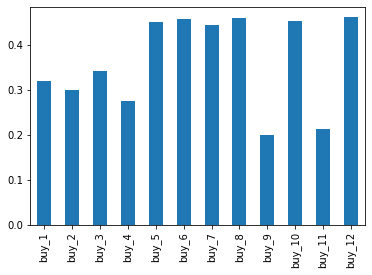

In [109]:
df = pd.read_csv('output/values_approx.csv')
pd.set_option('display.max_rows', 500)
for i in range(1,13):
	df['d_value_'+str(i)] = df['value_'+str(i)] - df['value_0']
for i in range(1,13):
	df['buy_'+str(i)] = df['d_value_'+str(i)]>0
df[['buy_'+str(i) for i in range(1,13)]].mean().plot.bar()

In [110]:
df[['value_'+str(i) for i in range(13)]].mean()

value_0     44.311323
value_1     43.103377
value_2     41.646076
value_3     43.082956
value_4     41.531804
value_5     44.272720
value_6     44.203919
value_7     44.266225
value_8     44.232833
value_9     42.512976
value_10    43.845645
value_11    42.557783
value_12    43.901271
dtype: float64

<AxesSubplot:>

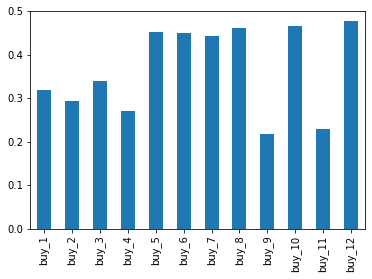

In [111]:
df = pd.read_csv('output/values_full.csv')
for i in range(1,13):
	df['d_value_'+str(i)] = df['value_'+str(i)] - df['value_0']
for i in range(1,13):
	df['buy_'+str(i)] = df['d_value_'+str(i)]>0
df[['buy_'+str(i) for i in range(1,13)]].mean().plot.bar()

In [112]:
df[['value_'+str(i) for i in range(13)]].mean()

value_0     44.275952
value_1     43.073665
value_2     41.590373
value_3     43.042053
value_4     41.475971
value_5     44.240250
value_6     44.178947
value_7     44.234199
value_8     44.205099
value_9     42.521729
value_10    43.856849
value_11    42.567144
value_12    43.913661
dtype: float64

# Simulated Profiles

We now compare simulated profiles with an approximation and without.  

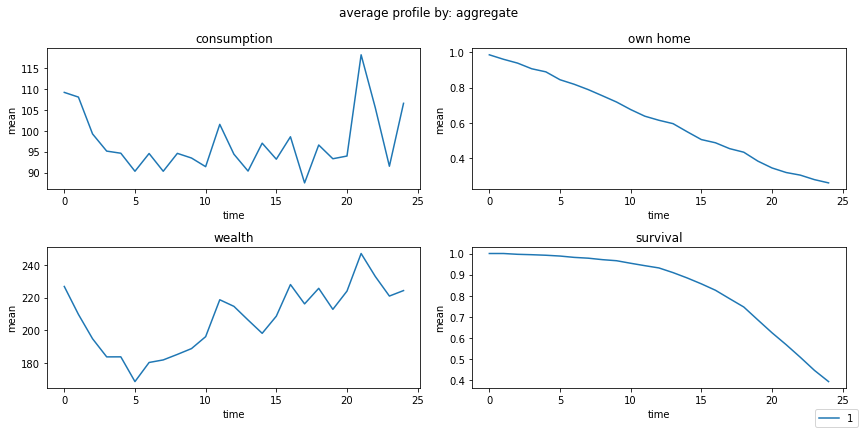

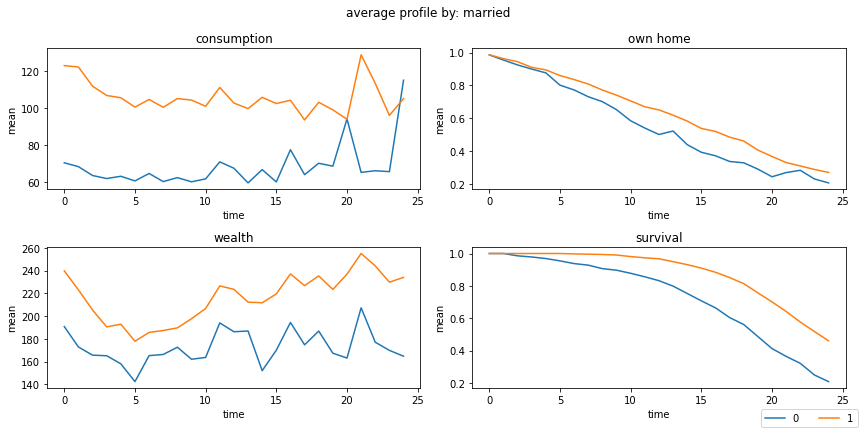

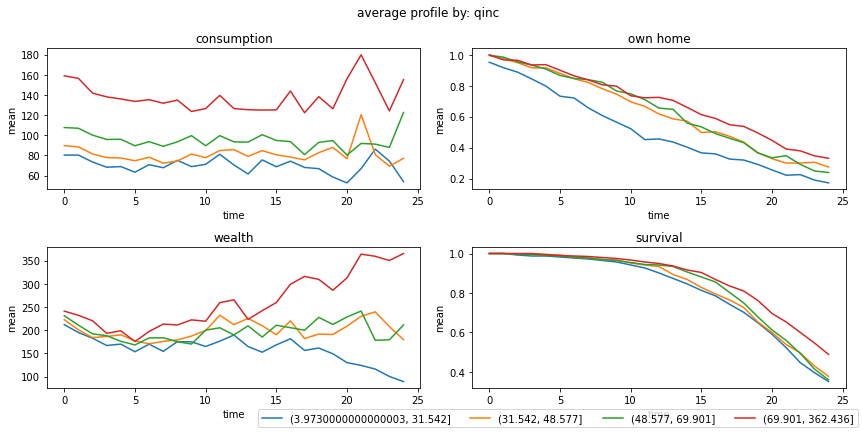

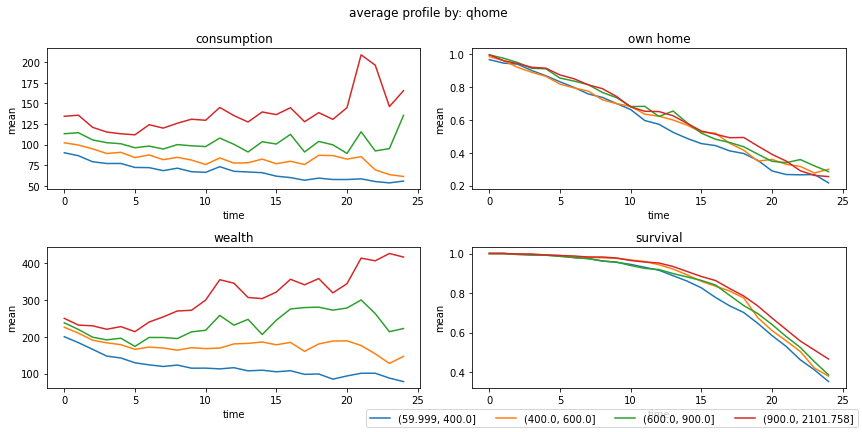

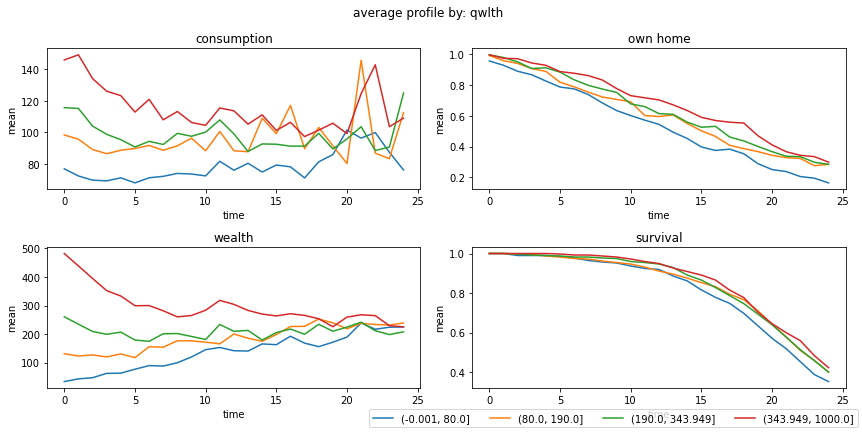

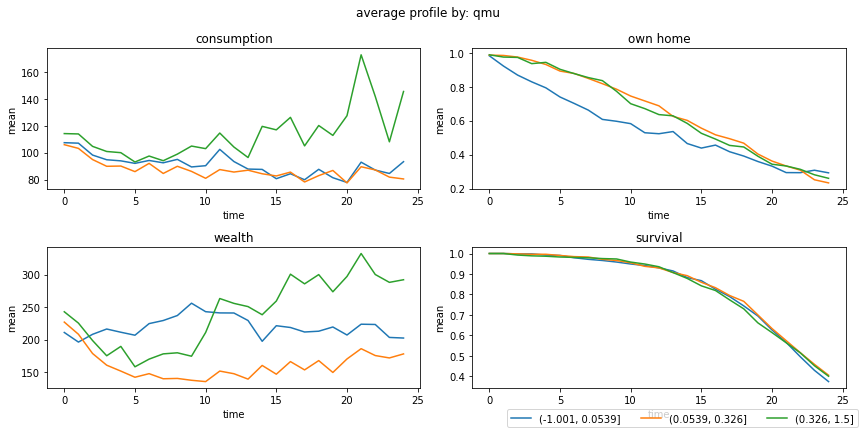

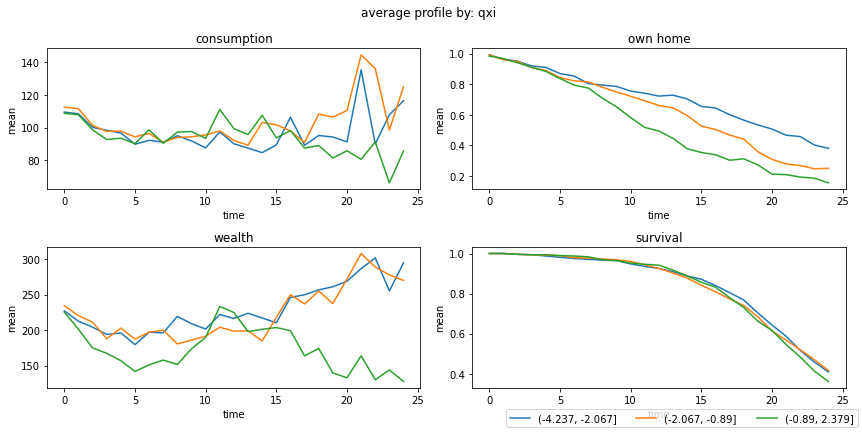

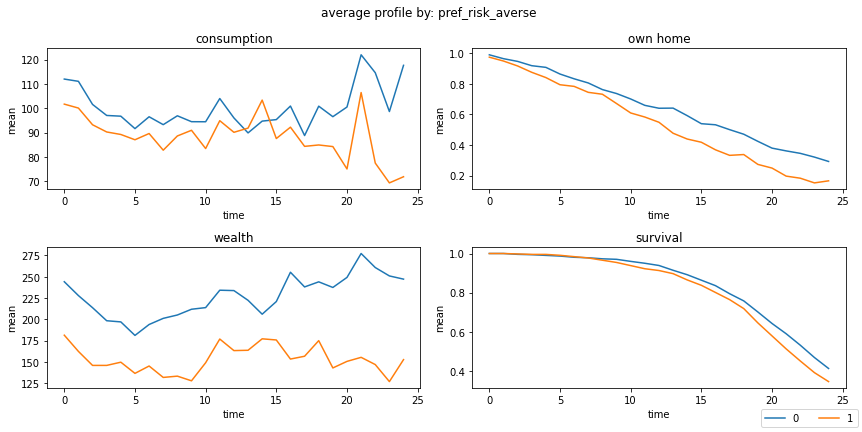

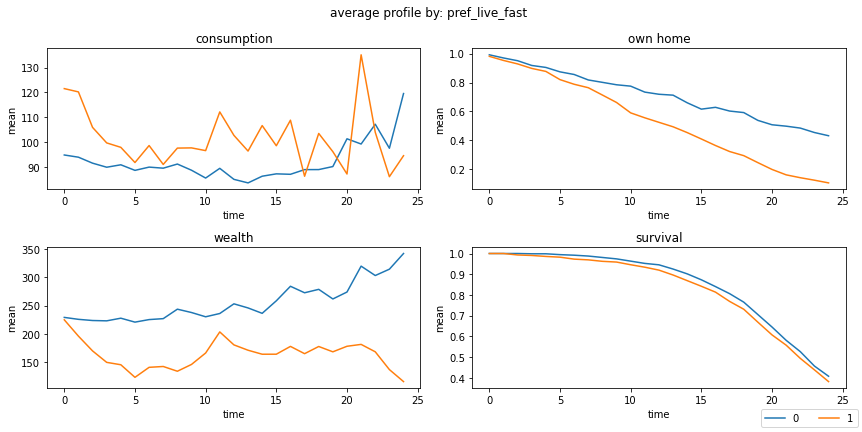

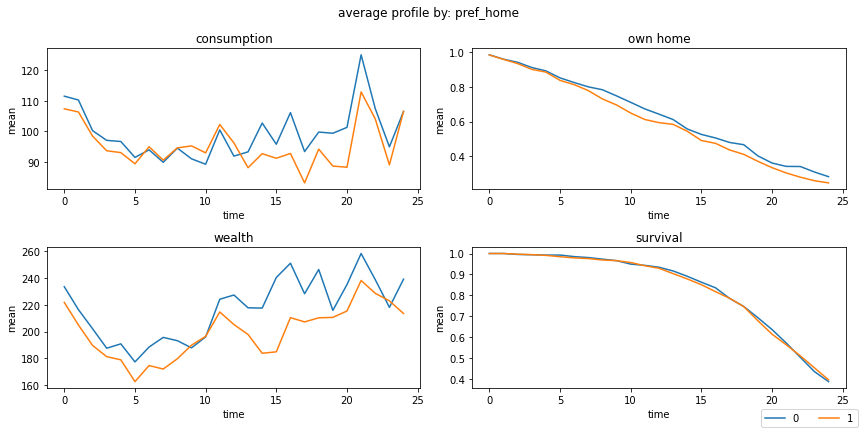

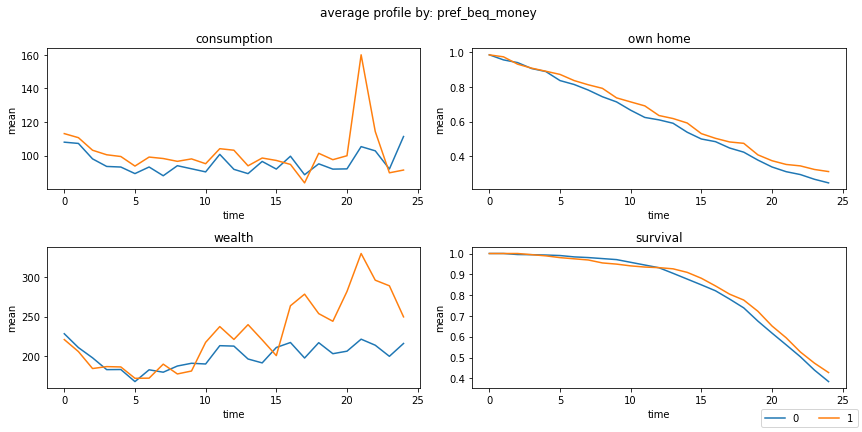

In [107]:
df = pd.read_csv('output/simulated_approx.csv')
df['qinc'] = pd.qcut(df['totinc'],q=4)
df['qhome'] = pd.qcut(df['home_value'],q=4)
df['qwlth'] = pd.qcut(df['wealth_total'],q=4)
df['qmu'] = pd.qcut(df['mu'],q=3)
df['qxi'] = pd.qcut(df['xi'],q=3)
df['aggregate'] = 1
for a in np.arange(35):
	df['surv_'+str(a)] = np.where(~df['cons_'+str(a)].isna(),1,0)
vars_list = ['aggregate','married','qinc','qhome','qwlth','qmu','qxi','pref_risk_averse','pref_live_fast','pref_home','pref_beq_money']
cut_time = 25
for v in vars_list:
	if v in df.columns:
		fig, ax = plt.subplots(2,2,figsize=(12, 6))
		dv = df[['cons_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[0,0].plot(dv.index,dv[c],label=c)
		ax[0,0].set_title('consumption')
		dv = df[['own_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[0,1].plot(dv.index,dv[c],label=c)
		ax[0,1].set_title('own home')
		dv = df[['wlth_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[1,0].plot(dv.index,dv[c],label=c)
		ax[1,0].set_title('wealth')
		dv = df[['surv_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[1,1].plot(dv.index,dv[c],label=c)
		ax[1,1].set_title('survival')
		fig.suptitle('average profile by: '+v)
		lines_labels = fig.axes[0].get_legend_handles_labels()
		fig.legend(lines_labels[0], lines_labels[1],ncol=4,loc="lower right")
		for a in ax.flat:
			a.set(xlabel='time', ylabel='mean')
		plt.tight_layout() 
		fig.show()

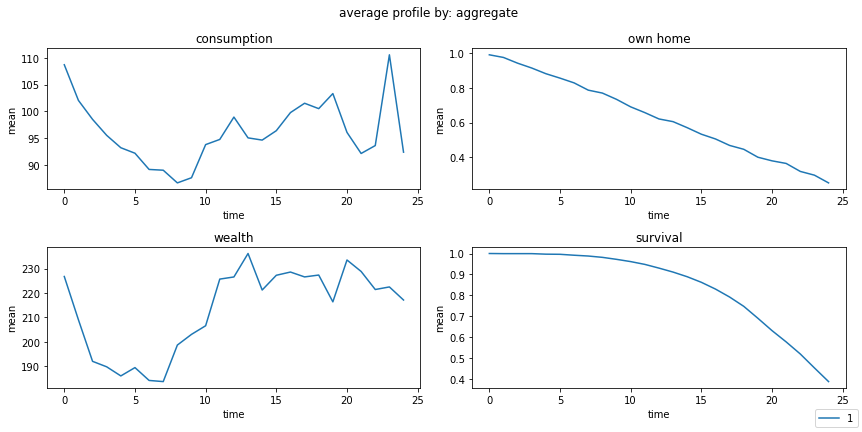

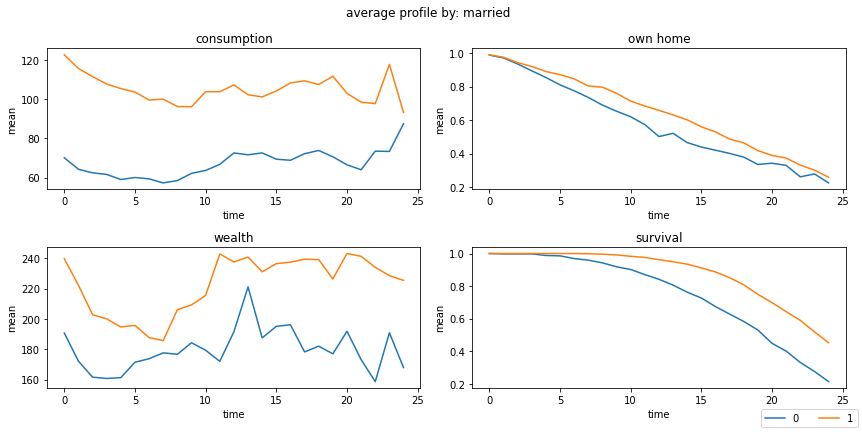

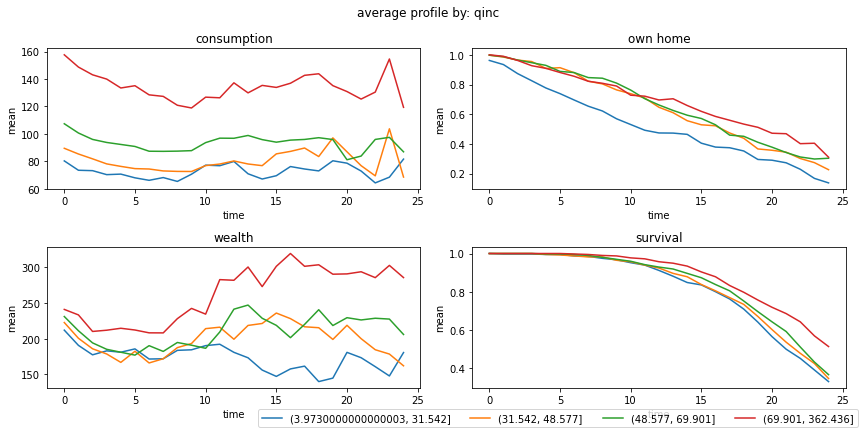

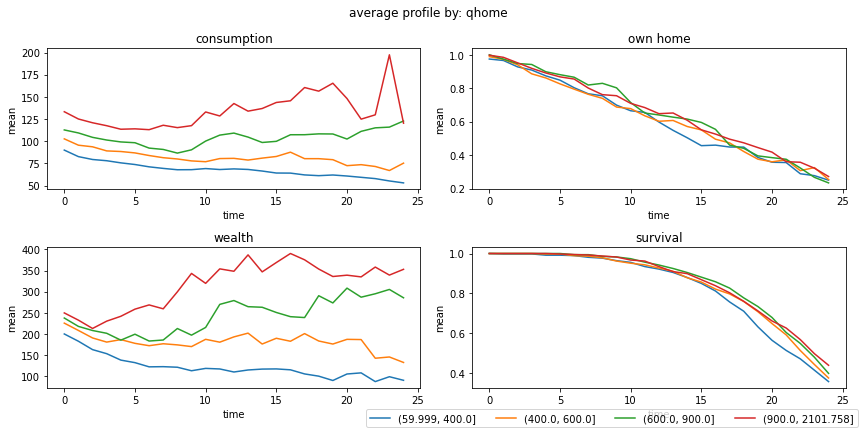

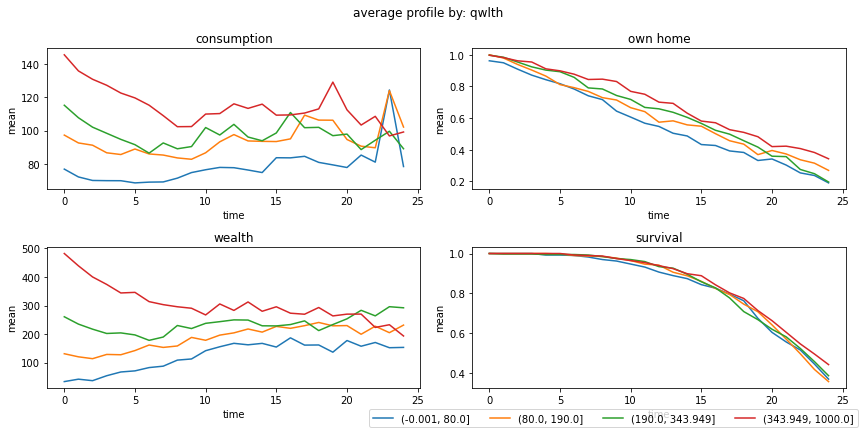

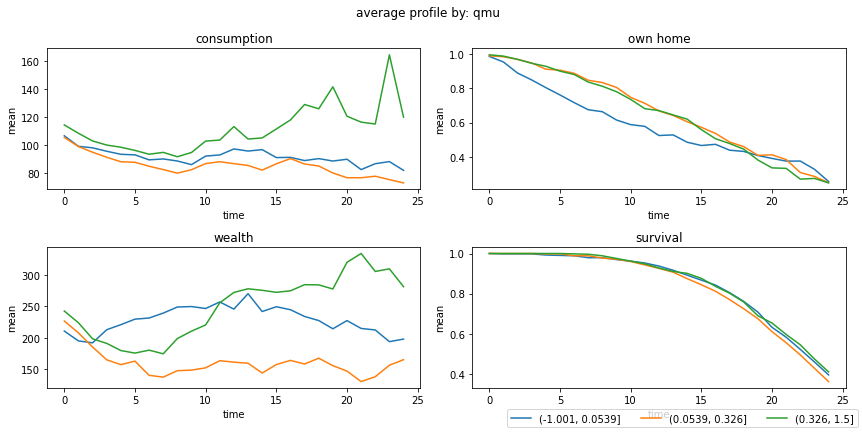

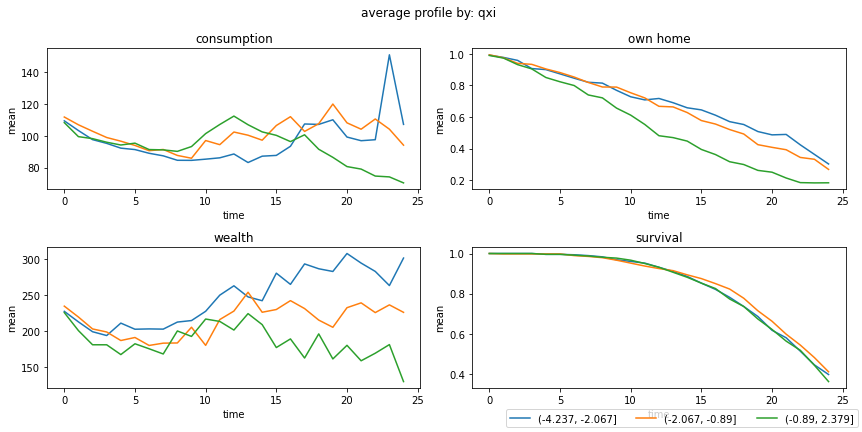

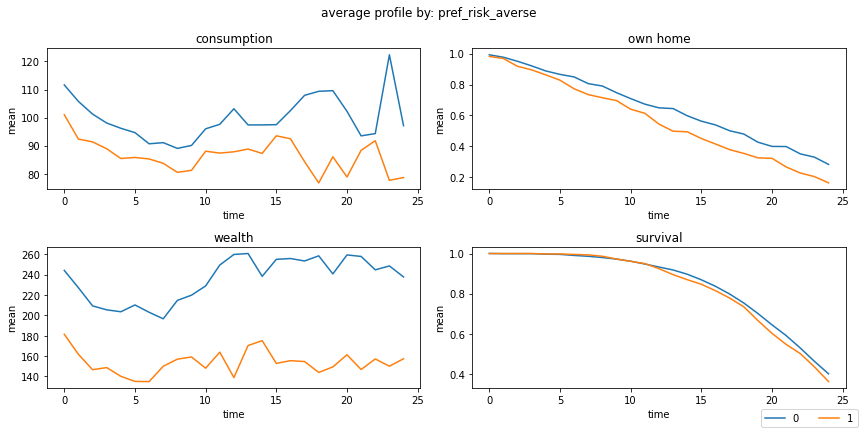

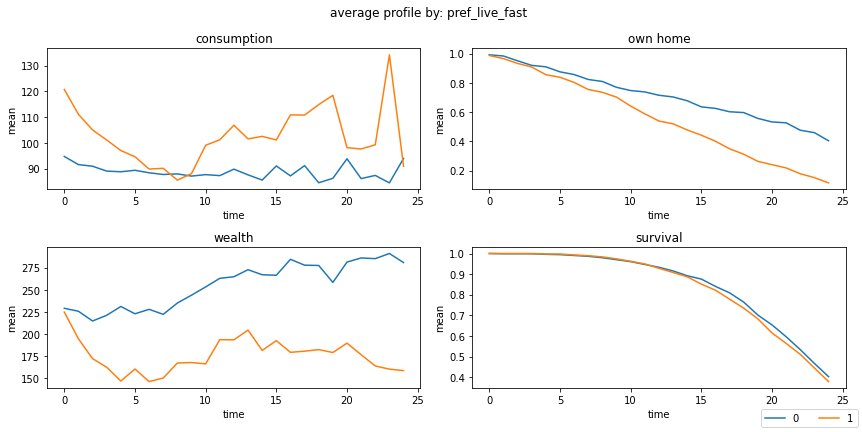

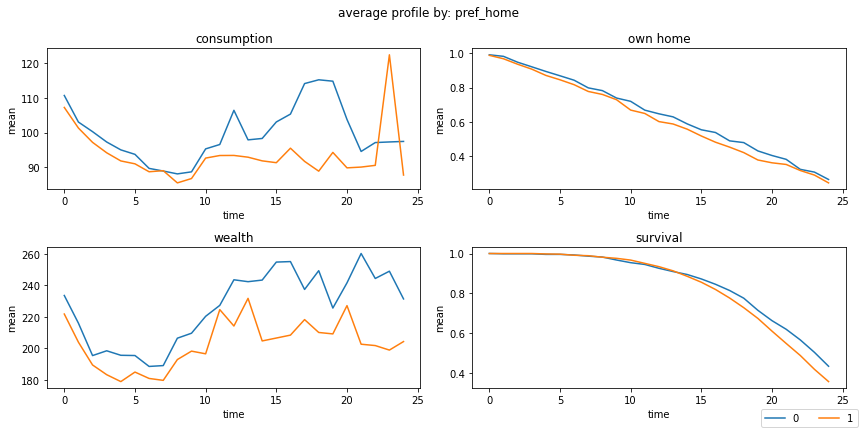

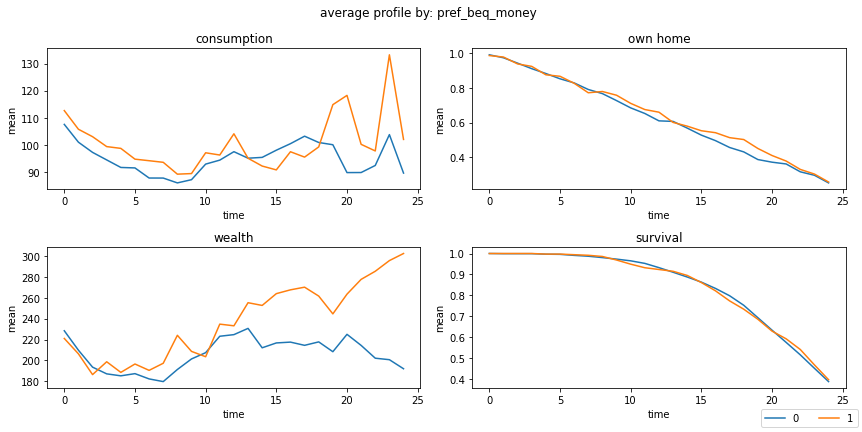

In [108]:
df = pd.read_csv('output/simulated_full.csv')
df['qinc'] = pd.qcut(df['totinc'],q=4)
df['qhome'] = pd.qcut(df['home_value'],q=4)
df['qwlth'] = pd.qcut(df['wealth_total'],q=4)
df['qmu'] = pd.qcut(df['mu'],q=3)
df['qxi'] = pd.qcut(df['xi'],q=3)
df['aggregate'] = 1
for a in np.arange(45):
	df['surv_'+str(a)] = np.where(~df['cons_'+str(a)].isna(),1,0)
vars_list = ['aggregate','married','qinc','qhome','qwlth','qmu','qxi','pref_risk_averse','pref_live_fast','pref_home','pref_beq_money']
cut_time = 25
for v in vars_list:
	if v in df.columns:
		fig, ax = plt.subplots(2,2,figsize=(12, 6))
		dv = df[['cons_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[0,0].plot(dv.index,dv[c],label=c)
		ax[0,0].set_title('consumption')
		dv = df[['own_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[0,1].plot(dv.index,dv[c],label=c)
		ax[0,1].set_title('own home')
		dv = df[['wlth_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[1,0].plot(dv.index,dv[c],label=c)
		ax[1,0].set_title('wealth')
		dv = df[['surv_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[1,1].plot(dv.index,dv[c],label=c)
		ax[1,1].set_title('survival')
		fig.suptitle('average profile by: '+v)
		lines_labels = fig.axes[0].get_legend_handles_labels()
		fig.legend(lines_labels[0], lines_labels[1],ncol=4,loc="lower right")
		for a in ax.flat:
			a.set(xlabel='time', ylabel='mean')
		plt.tight_layout() 
		fig.show()

In [46]:
from numba import njit, float64, int64, vectorize
from functools import partial

In [43]:
f = partial(func,n=5)

In [44]:
f(2)

32.0